## Random Forest Classification Animation (Trees Growing Over Time)

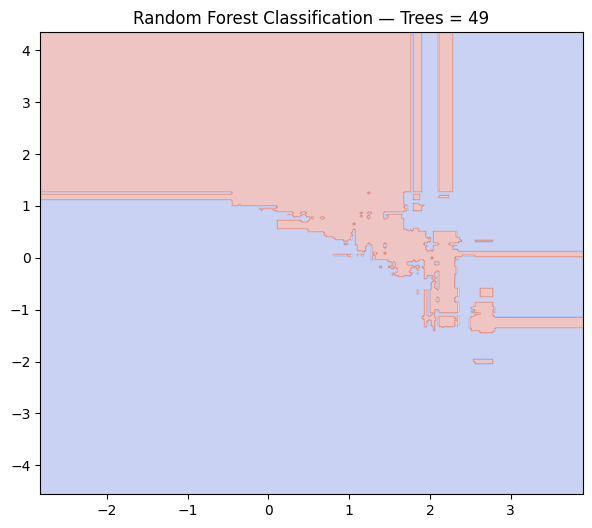

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Create folder for GIFs
os.makedirs("gifs", exist_ok=True)

# Generate dataset
X, y = make_classification(
    n_samples=400, n_features=2,
    n_informative=2, n_redundant=0,
    n_clusters_per_class=1, random_state=42
)

# Grid for decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Number of trees to animate
tree_counts = list(range(1, 51, 2))   # 1, 3, 5, ..., 49

fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=25)

def update(i):
    # Remove all old contours safely
    while ax.collections:
        ax.collections[-1].remove()

    n_trees = tree_counts[i]

    # Train forest with growing number of trees
    model = RandomForestClassifier(
        n_estimators=n_trees,
        max_depth=None,
        random_state=42
    )
    model.fit(X, y)

    # Predict on grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    # Draw decision regions
    ax.contourf(xx, yy, preds, alpha=0.3, cmap="coolwarm")

    ax.set_title(f"Random Forest Classification — Trees = {n_trees}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

ani = FuncAnimation(fig, update, frames=len(tree_counts), interval=400)

# Save GIF
ani.save("gifs/random_forest_classification.gif", writer="pillow")

plt.show()
